# Shallow Learning Algorithms:  Classifications
Shallow learning algorithms, also known as traditional machine learning (ML) or shallow machine learning, are a class of ML algorithms that typically have a single layer of data transformation and learning, or a limited number of layers or levels of abstraction in their models. They are often used for simpler tasks such as binary classification, linear regression, or low-dimensional feature extraction.

## Dependencies

In [1]:
%pip install xgboost==2.0.3 ipykernel==6.28.0 pandas==2.1.4 scikit-learn seaborn xgboost numpy matplotlib

  Using cached xgboost-2.0.3-py3-none-macosx_12_0_arm64.whl.metadata (2.0 kB)
  Using cached ipykernel-6.28.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached pandas-2.1.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (18 kB)
  Using cached scikit_learn-1.5.1-cp311-cp311-macosx_12_0_arm64.whl.metadata (12 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.0.1-cp311-cp311-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached matplotlib-3.9.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached scipy-1.14.0-cp311-cp311-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (114 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.2.1-cp311-cp31

## Imports

In [2]:
import numpy as np
import pandas as pd  # interface for data loading
import matplotlib.pyplot as plt  # visualization
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, learning_curve  # splitting data, learning curve
from sklearn.metrics import mean_absolute_error  # evaluation metric
from sklearn.model_selection import cross_val_score  # cross-validation
from sklearn.model_selection import GridSearchCV  # hyperparameter tuning
from xgboost import XGBClassifier

## Load 20 Newsgroups Dataset
In this notebook, I will work on text classification, a common task in natural language processing (NLP). The main objective is to automatically assign text documents to predefined categories or classes. I’ll be using the “scikit-learn 20 Newsgroups” dataset, which contains a well-known collection of newsgroup documents. The goal is to build a text classification model that accurately predicts the category of a given text document. I used two popular vectorizers with six different classifiers to train the model to determine which one works better:
- [Count Vectorizer](https://www.ibm.com/reference/python/countvectorizer)
    + [Naive Bayes classifiers](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
    + [Linear Support Vector Machine classifier](https://en.wikipedia.org/wiki/Support_vector_machine#:~:text=In%20the%20case%20of%20support,is%20called%20a%20linear%20classifier)
    + [XG Boost (eXtreme Gradient Boosting) classifier](https://www.nvidia.com/en-us/glossary/xgboost/)
    + [Random Forest classifier](https://www.ibm.com/topics/random-forest)
    + [Logistic Regression Model classifier](https://en.wikipedia.org/wiki/Logistic_regression#:~:text=The%20logistic%20regression%20model%20itself,than%20the%20cutoff%20as%20one)
- [TF-IDF means Term Frequency - Inverse Document Frequency Vectorizer](https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/)
    + [Decision Tree classifier](https://www.ibm.com/topics/decision-trees#:~:text=A%20decision%20tree%20is%20a,internal%20nodes%20and%20leaf%20nodes)

In [3]:
# Load the 20 newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Create a DataFrame from the dataset
df = pd.DataFrame({'text': newsgroups.data, 'label': newsgroups.target, 'label_name': newsgroups.target})

# Map target labels to target names
df['label_name'] = df['label'].map(lambda x: newsgroups.target_names[x])

# Explore the dataset
print(df.head())
print(df['label_name'].value_counts())

                                                text  label  \
0  \n\nI am sure some bashers of Pens fans are pr...     10   
1  My brother is in the market for a high-perform...      3   
2  \n\n\n\n\tFinally you said what you dream abou...     17   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...      3   
4  1)    I have an old Jasmine drive which I cann...      4   

                 label_name  
0          rec.sport.hockey  
1  comp.sys.ibm.pc.hardware  
2     talk.politics.mideast  
3  comp.sys.ibm.pc.hardware  
4     comp.sys.mac.hardware  
label_name
rec.sport.hockey            999
soc.religion.christian      997
rec.motorcycles             996
rec.sport.baseball          994
sci.crypt                   991
rec.autos                   990
sci.med                     990
comp.windows.x              988
sci.space                   987
comp.os.ms-windows.misc     985
sci.electronics             984
comp.sys.ibm.pc.hardware    982
misc.forsale                975
comp.graphics 

## Exploratory Data Analysis (EDA)
Visualize the distribution of categories in the dataset.

> The charts helps us visualize the balance or imbalance of the categories, to see if we will have challenges durng the model training process. 

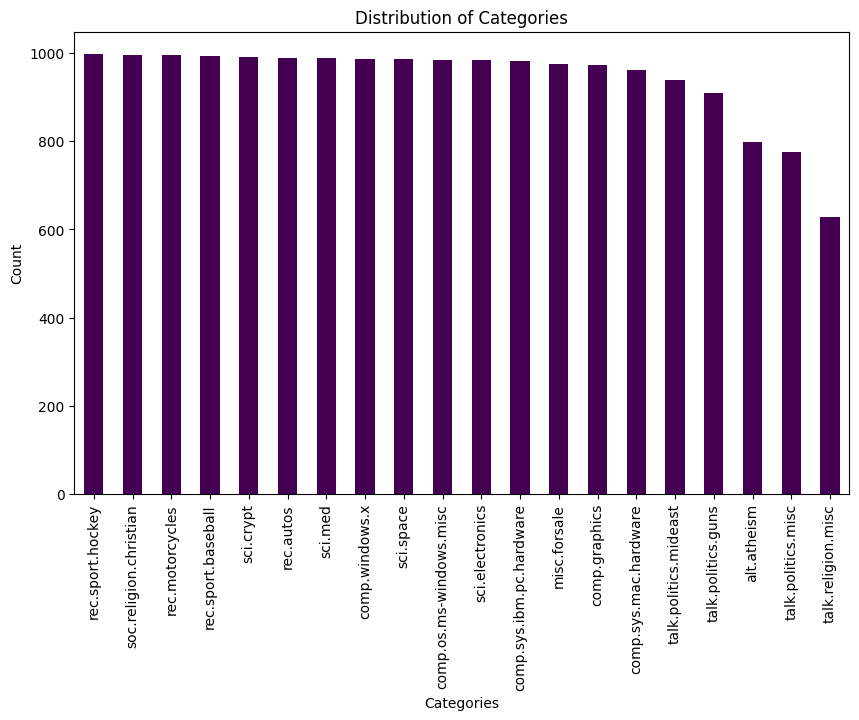

In [4]:
# Visualize the distribution of categories
plt.figure(figsize=(10, 6))
df['label_name'].value_counts().plot(kind='bar', colormap='viridis')
plt.title('Distribution of Categories')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

## Split the dataset into training and test, respectively

In [5]:
X = df['text']
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Extraction with the `CountVectorizer`
CountVectorizer is a class in scikit-learn that transforms a collection of text documents into a numerical matrix of word or token counts.

In [6]:
# `CountVectorizer` to convert the text data into numerical features, creating
# a "bag of words" representation
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

### Using the Naive Bayes classifier
In statistics, [Naive Bayes classifiers](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) are a family of linear "probabilistic classifiers" which assumes that the features are conditionally independent, given the target class. The strength (naivety) of this assumption is what gives the classifier its name.

In [7]:
classifierNb = MultinomialNB()
classifierNb.fit(X_train_vec, y_train)

# Get predictions
predictionsNb = classifierNb.predict(X_test_vec)

#### Model performance results

Accuracy: 0.62
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.25      0.36       151
           1       0.48      0.75      0.58       202
           2       0.73      0.04      0.08       195
           3       0.53      0.73      0.62       183
           4       0.86      0.58      0.69       205
           5       0.68      0.80      0.74       215
           6       0.88      0.53      0.66       193
           7       0.87      0.63      0.73       196
           8       0.49      0.58      0.53       168
           9       0.99      0.67      0.80       211
          10       0.92      0.80      0.86       198
          11       0.59      0.77      0.67       201
          12       0.84      0.49      0.62       202
          13       0.82      0.75      0.79       194
          14       0.76      0.69      0.72       189
          15       0.36      0.95      0.52       202
          16       0.80      0.55      0.6

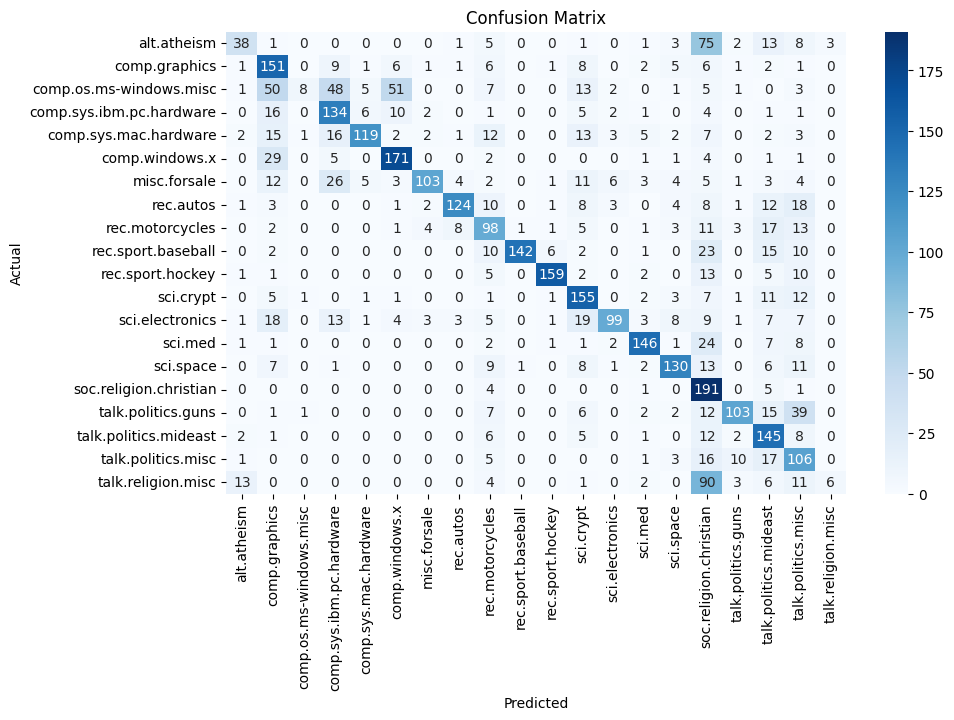

In [8]:
accuracy = accuracy_score(y_test, predictionsNb)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, predictionsNb)
print('Classification Report:\n', report)

# Visualize confusion matrix
from sklearn.metrics import confusion_matrix
%pip install seaborn --upgrade
%pip install matplotlib --upgrade
import seaborn as sns

cm = confusion_matrix(y_test, predictionsNb)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Model learning curve
Using `scikit-learn` `learning_curve` function to take a small dataset size to understand how it affects the model performance.

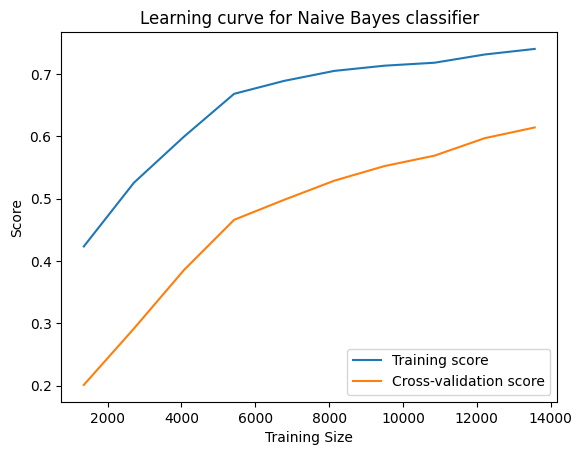

In [9]:
train_sizes, train_scores, test_scores = learning_curve(classifierNb, X_train_vec, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.title('Learning curve for Naive Bayes classifier')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()

### Using the Linear Support Vector Machine classifier

In [10]:
classifierSvc = svm.SVC()
classifierSvc.fit(X_train_vec, y_train)

# Get predicitions
predictionsSvc = classifierSvc.predict(X_test_vec)

#### Model performance results

Accuracy: 0.15
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.03      0.05       151
           1       0.43      0.01      0.03       202
           2       0.37      0.10      0.15       195
           3       0.30      0.08      0.13       183
           4       0.00      0.00      0.00       205
           5       0.85      0.05      0.10       215
           6       0.09      0.85      0.16       193
           7       0.04      0.01      0.02       196
           8       0.06      0.42      0.10       168
           9       0.64      0.08      0.14       211
          10       0.71      0.11      0.19       198
          11       0.53      0.18      0.27       201
          12       0.38      0.02      0.05       202
          13       0.30      0.15      0.20       194
          14       0.53      0.11      0.18       189
          15       0.36      0.31      0.33       202
          16       0.77      0.09      0.1

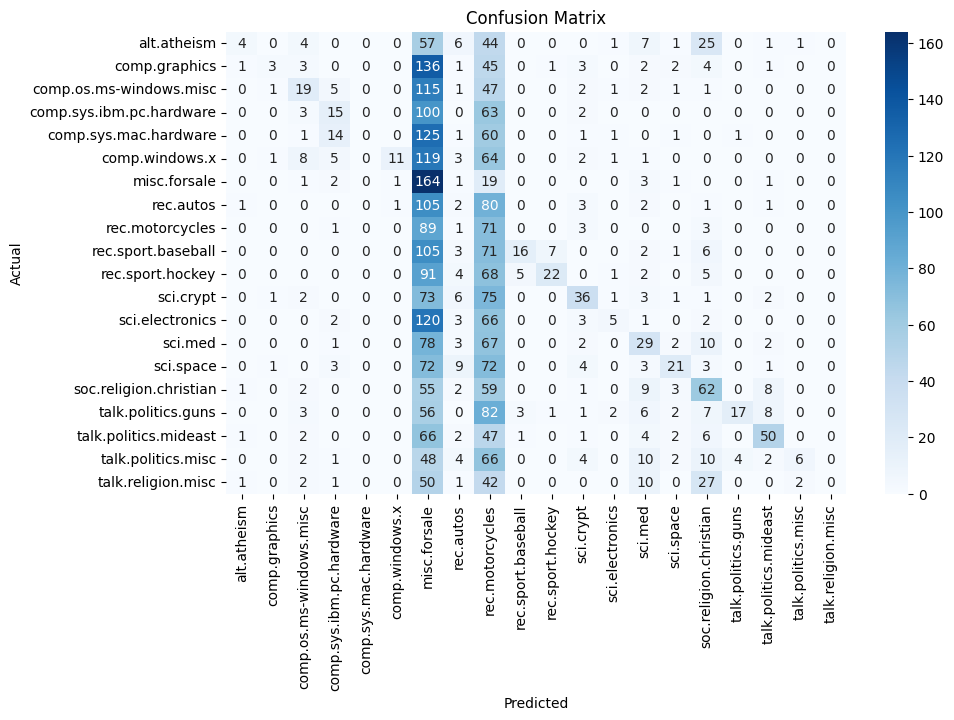

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, predictionsSvc)
print(f'Accuracy: {accuracy:.2f}')

# Generate classification report with zero_division parameter
report = classification_report(y_test, predictionsSvc, zero_division=0)
print('Classification Report:\n', report)

# Visualize confusion matrix
cm = confusion_matrix(y_test, predictionsSvc)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Model learning curve
Using `scikit-learn` `learning_curve` function to take a small dataset size to understand how it affects the model performance.

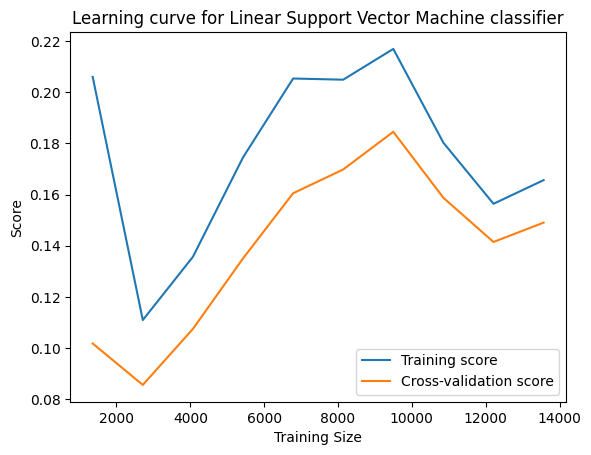

In [16]:
train_sizes, train_scores, test_scores = learning_curve(classifierSvc, X_train_vec, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.title('Learning curve for Linear Support Vector Machine classifier')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()

### Using the XG Boost (eXtreme Gradient Boosting) classifier

In [13]:
classifierXGBoost =  XGBClassifier()
classifierXGBoost.fit(X_train_vec, y_train)

# Get predicitions
predictionsXGBoost = classifierXGBoost.predict(X_test_vec)

#### Model performance results

Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.42      0.46       151
           1       0.67      0.63      0.65       202
           2       0.66      0.64      0.65       195
           3       0.50      0.60      0.55       183
           4       0.81      0.65      0.72       205
           5       0.81      0.70      0.75       215
           6       0.72      0.70      0.71       193
           7       0.42      0.70      0.52       196
           8       0.57      0.62      0.59       168
           9       0.72      0.66      0.69       211
          10       0.81      0.77      0.79       198
          11       0.84      0.70      0.76       201
          12       0.48      0.55      0.51       202
          13       0.77      0.78      0.78       194
          14       0.71      0.74      0.72       189
          15       0.66      0.70      0.68       202
          16       0.66      0.65      0.6

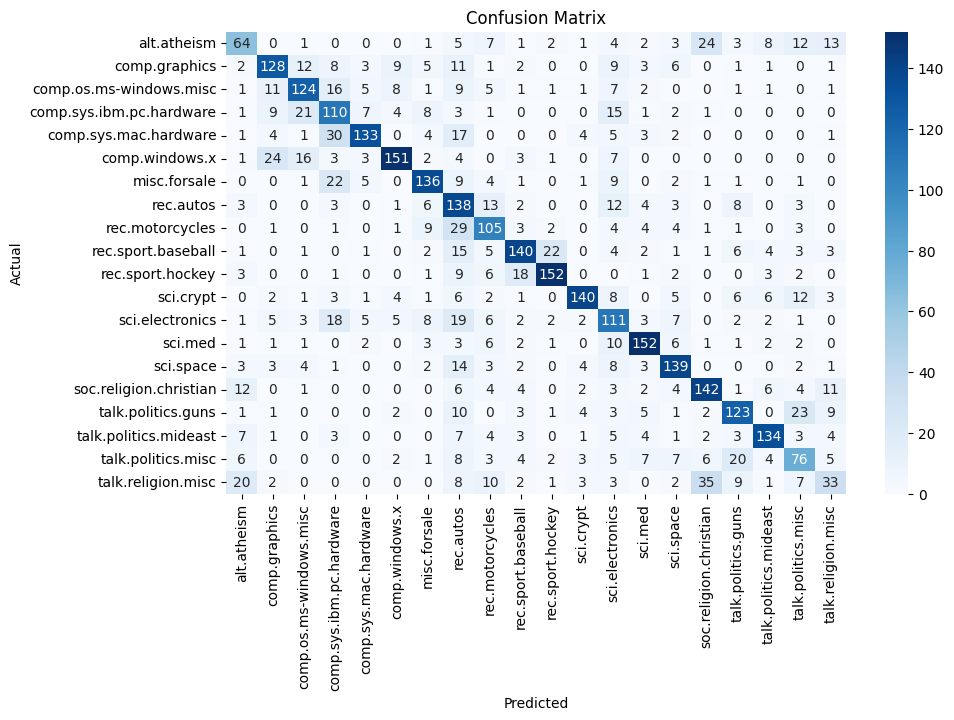

In [14]:
accuracy = accuracy_score(y_test, predictionsXGBoost)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, predictionsXGBoost)
print('Classification Report:\n', report)

# Visualize confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictionsXGBoost)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Model learning curve
Using `scikit-learn` `learning_curve` function to take a small dataset size to understand how it affects the model performance.

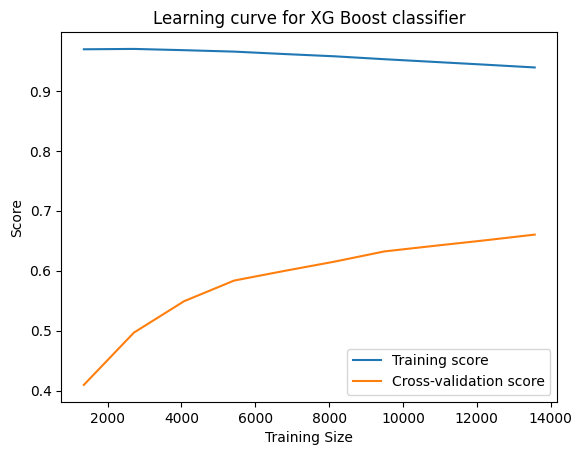

In [15]:
train_sizes, train_scores, test_scores = learning_curve(classifierXGBoost, X_train_vec, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.title('Learning curve for XG Boost classifier')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()

### Using the Random Forest classifier

In [17]:
classifierRmc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifierRmc.fit(X_train_vec, y_train)

# Get predicitions
predictionsRmc = classifierRmc.predict(X_test_vec)

#### Model performance results

Accuracy: 0.30
Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.21      0.15       151
           1       0.20      0.36      0.26       202
           2       0.32      0.46      0.38       195
           3       0.20      0.28      0.23       183
           4       0.25      0.26      0.26       205
           5       0.39      0.37      0.38       215
           6       0.45      0.48      0.46       193
           7       0.19      0.30      0.23       196
           8       0.21      0.23      0.22       168
           9       0.33      0.35      0.34       211
          10       0.46      0.47      0.47       198
          11       0.45      0.38      0.42       201
          12       0.16      0.12      0.14       202
          13       0.39      0.24      0.30       194
          14       0.32      0.20      0.24       189
          15       0.44      0.36      0.40       202
          16       0.30      0.17      0.2

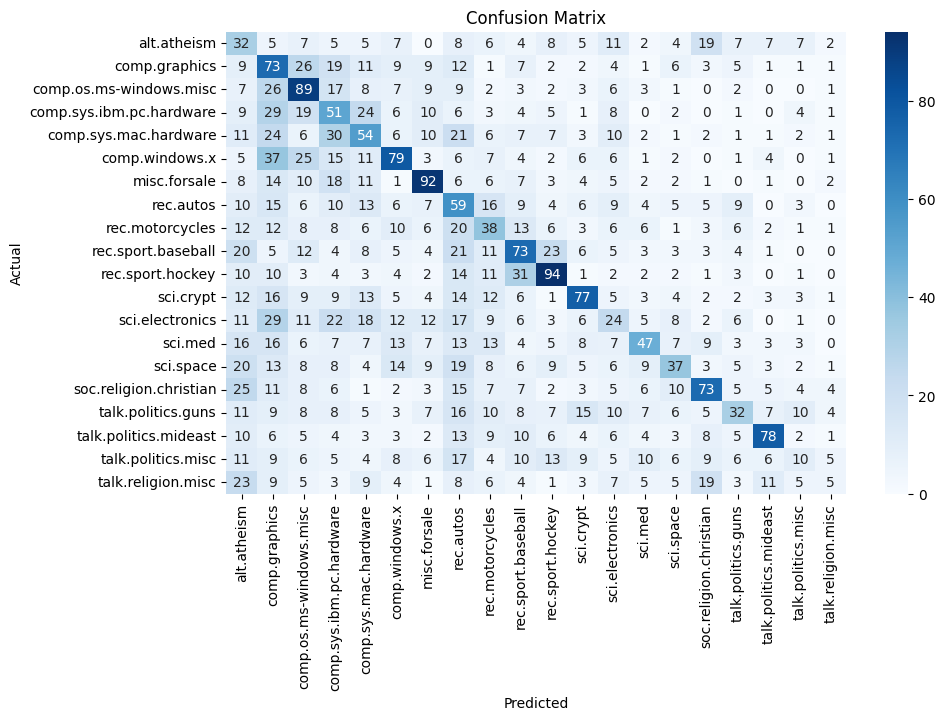

In [18]:
accuracy = accuracy_score(y_test, predictionsRmc)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, predictionsRmc)
print('Classification Report:\n', report)

# Visualize confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictionsRmc)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Model learning curve
Using `scikit-learn` `learning_curve` function to take a small dataset size to understand how it affects the model performance.

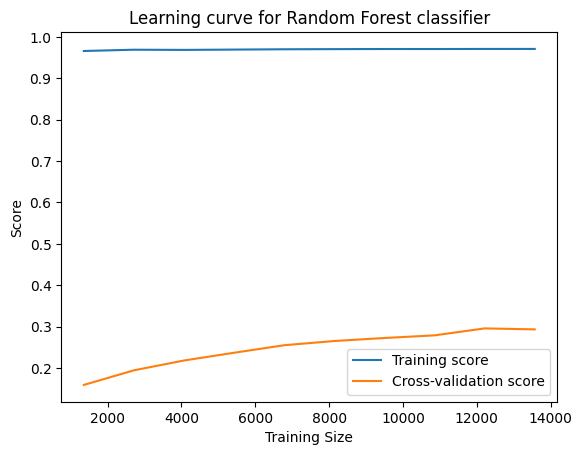

In [19]:
train_sizes, train_scores, test_scores = learning_curve(classifierRmc, X_train_vec, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.title('Learning curve for Random Forest classifier')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()

### Using the Logistic Regression Model classifier

In [20]:
classifierLr = LogisticRegression(max_iter=1000)
classifierLr.fit(X_train_vec, y_train)

# Get predictions
predictionsLr = classifierLr.predict(X_test_vec)

#### Model performance results

Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.56      0.56       151
           1       0.64      0.64      0.64       202
           2       0.63      0.61      0.62       195
           3       0.54      0.58      0.56       183
           4       0.71      0.66      0.69       205
           5       0.73      0.71      0.72       215
           6       0.74      0.71      0.72       193
           7       0.45      0.71      0.55       196
           8       0.67      0.67      0.67       168
           9       0.78      0.77      0.77       211
          10       0.90      0.84      0.87       198
          11       0.78      0.68      0.73       201
          12       0.62      0.62      0.62       202
          13       0.75      0.78      0.76       194
          14       0.68      0.69      0.69       189
          15       0.79      0.69      0.74       202
          16       0.71      0.63      0.6

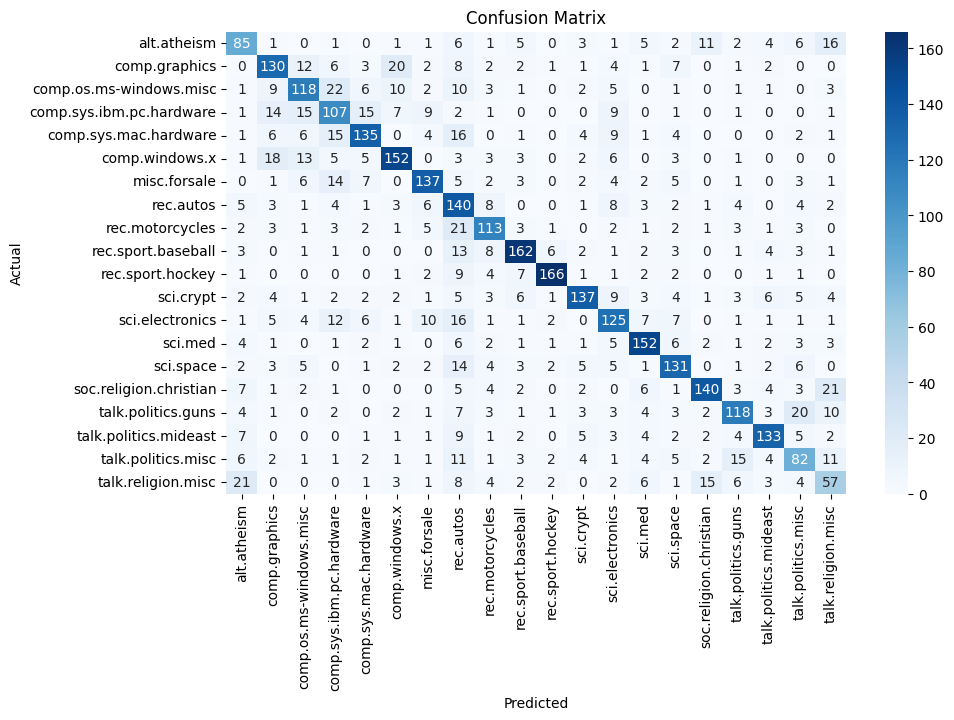

In [21]:
accuracy = accuracy_score(y_test, predictionsLr)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, predictionsLr)
print('Classification Report:\n', report)

# Visualize confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictionsLr)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Model learning curve
Using `scikit-learn` `learning_curve` function to take a small dataset size to understand how it affects the model performance.

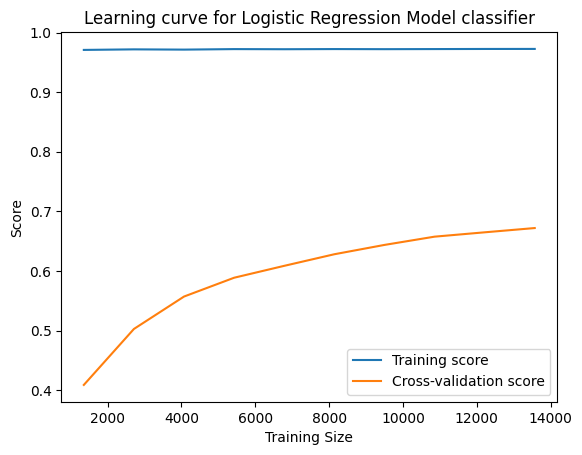

In [22]:
train_sizes, train_scores, test_scores = learning_curve(classifierLr, X_train_vec, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.title('Learning curve for Logistic Regression Model classifier')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()

## Feature Extraction with the `TfidfVectorizer`
TF-IDF means Term Frequency - Inverse Document Frequency. This is a statistic that is based on the frequency of a word in the corpus but it also provides a numerical representation of how important a word is for statistical analysis.

TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

In [23]:
# Text data is converted into TF-IDF feature vectors. TF-IDF (Term Frequency-Inverse
# Document Frequency) is a numerical statistic that reflects how important a word is
# to a document in a collection. 
vectorizerTfid = TfidfVectorizer(stop_words='english')
X_train_tfid_vec = vectorizerTfid.fit_transform(X_train)
X_test_tfid_vec = vectorizerTfid.transform(X_test)

### Using the Decision Tree classifier

In [24]:
classifierDtc = DecisionTreeClassifier(random_state=42)
classifierDtc.fit(X_train_tfid_vec, y_train)

# Get predictions
predictionsDtc = classifierDtc.predict(X_test_tfid_vec)

#### Model performance results

Accuracy: 0.47
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.36      0.34       151
           1       0.34      0.32      0.33       202
           2       0.47      0.48      0.47       195
           3       0.36      0.42      0.39       183
           4       0.56      0.49      0.52       205
           5       0.62      0.57      0.59       215
           6       0.56      0.52      0.54       193
           7       0.32      0.61      0.42       196
           8       0.55      0.53      0.54       168
           9       0.56      0.54      0.55       211
          10       0.66      0.60      0.63       198
          11       0.65      0.56      0.60       201
          12       0.33      0.32      0.32       202
          13       0.56      0.55      0.55       194
          14       0.54      0.51      0.53       189
          15       0.48      0.46      0.47       202
          16       0.44      0.41      0.4

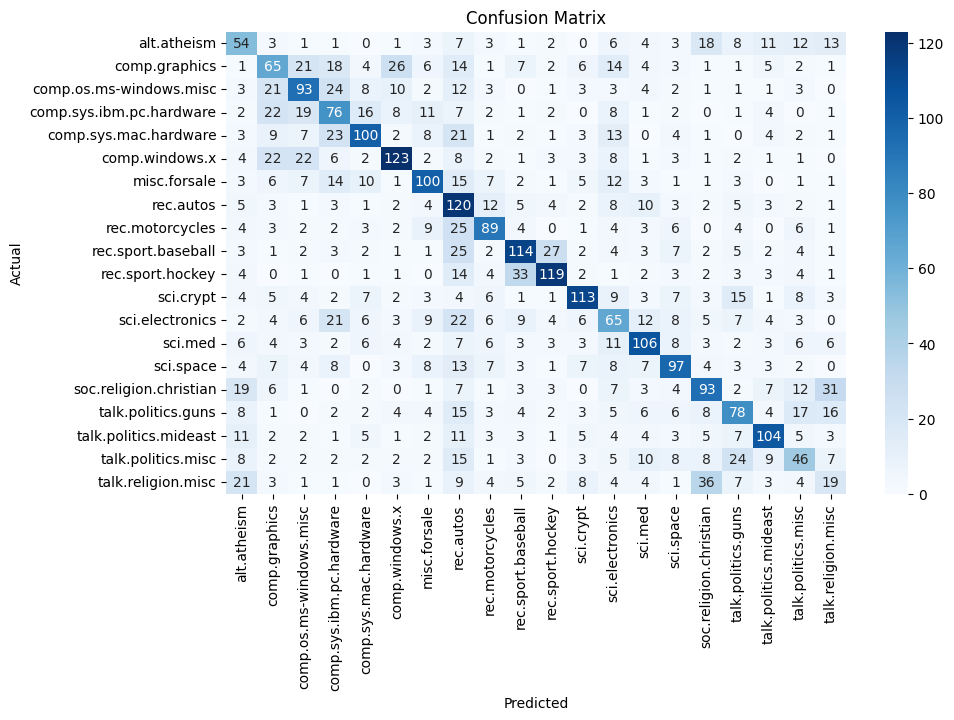

In [25]:
accuracy = accuracy_score(y_test, predictionsDtc)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, predictionsDtc)
print('Classification Report:\n', report)

# Visualize confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictionsDtc)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Model learning curve
Using `scikit-learn` `learning_curve` function to take a small dataset size to understand how it affects the model performance.

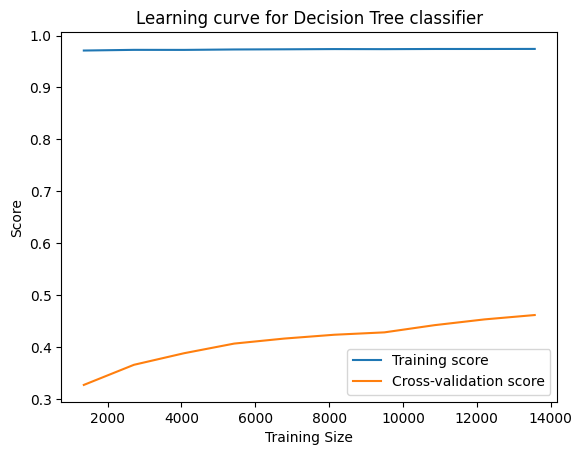

In [26]:
train_sizes, train_scores, test_scores = learning_curve(classifierDtc, X_train_vec, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.title('Learning curve for Decision Tree classifier')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()